In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import sys
import subprocess
import datetime as dt
import itertools
from dask.distributed import Client, LocalCluster, wait
import dask.array as da
import cmocean
from MHW_daily_calcs import *

Plot SEDI based on daily forecasts at leads of 1.5, 3.5, 6.5, .5 months ~ 45, 105, 195, 15 days
- out of order to align with monthly plots for 1st 3

In [2]:
climyrs=[1993,2023]
qtile=0.90
detr=True
qtvar='qt1'
delt=15

In [3]:
cm1=cmocean.cm.balance

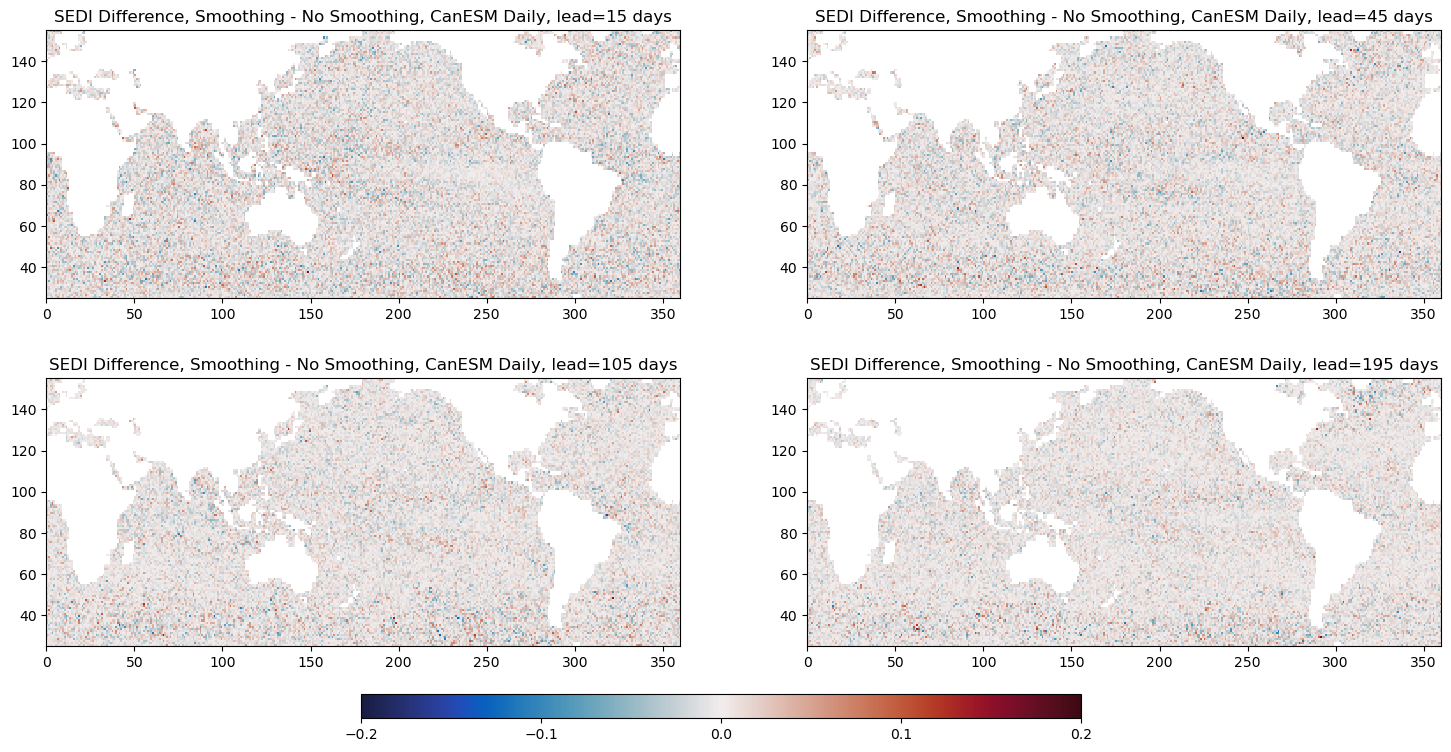

In [4]:
leadlist=[ 15, 45, 105, 195]
fSEDI_S={}
fSEDI_I={}
for ilead in leadlist:
    fSEDI_S[ilead]=xr.open_mfdataset([fnameSEDI_OISST_CanESM_daily(ilead,climyrs, smoothClim=True, meth=method, win=halfwin, 
                                                                   detr=detr, qt=qtile, delt=delt, qtvar=qtvar, jj=jj) \
                                    for jj in (0,60,120)],combine='nested')
    fSEDI_I[ilead]=xr.open_mfdataset([fnameSEDI_OISST_CanESM_daily(ilead,climyrs, smoothClim=False, meth=None, win=1, 
                                                                   detr=detr, qt=qtile, delt=delt, qtvar=qtvar, jj=jj) \
                                    for jj in (0,60,120)],combine='nested')
SEDICan=dict()
fig,axs=plt.subplots(2,2,figsize=(18,8),gridspec_kw={'hspace':.3})
ax=axs[0,0]; il=leadlist[0]
SEDI_S=fSEDI_S[il].SEDI
SEDI_I=fSEDI_I[il].SEDI
m1=ax.pcolormesh(SEDI_S-SEDI_I,vmin=-.2,vmax=.2,cmap=cm1)
ax.set_ylim(25,155)
ax.set_title(f'SEDI Difference, Smoothing - No Smoothing, CanESM Daily, lead={il} days')

ax=axs[0,1]; il=leadlist[1]
SEDI_S=fSEDI_S[il].SEDI
SEDI_I=fSEDI_I[il].SEDI
m1=ax.pcolormesh(SEDI_S-SEDI_I,vmin=-.2,vmax=.2,cmap=cm1)
ax.set_ylim(25,155)
ax.set_title(f'SEDI Difference, Smoothing - No Smoothing, CanESM Daily, lead={il} days')

ax=axs[1,0]; il=leadlist[2]
SEDI_S=fSEDI_S[il].SEDI
SEDI_I=fSEDI_I[il].SEDI
m1=ax.pcolormesh(SEDI_S-SEDI_I,vmin=-.2,vmax=.2,cmap=cm1)
ax.set_ylim(25,155)
ax.set_title(f'SEDI Difference, Smoothing - No Smoothing, CanESM Daily, lead={il} days')

ax=axs[1,1]; il=leadlist[3]
SEDI_S=fSEDI_S[il].SEDI
SEDI_I=fSEDI_I[il].SEDI
m1=ax.pcolormesh(SEDI_S-SEDI_I,vmin=-.2,vmax=.2,cmap=cm1)
ax.set_ylim(25,155)
ax.set_title(f'SEDI Difference, Smoothing - No Smoothing, CanESM Daily, lead={il} days')

ml=fig.add_axes([.3,.02,.4,.03])
fig.colorbar(m1,cax=ml,orientation='horizontal',ticks=[-.2,-.1,0,.1,.2])
for el in fSEDI_S.keys():
    fSEDI_S[el].close()
    fSEDI_I[el].close()

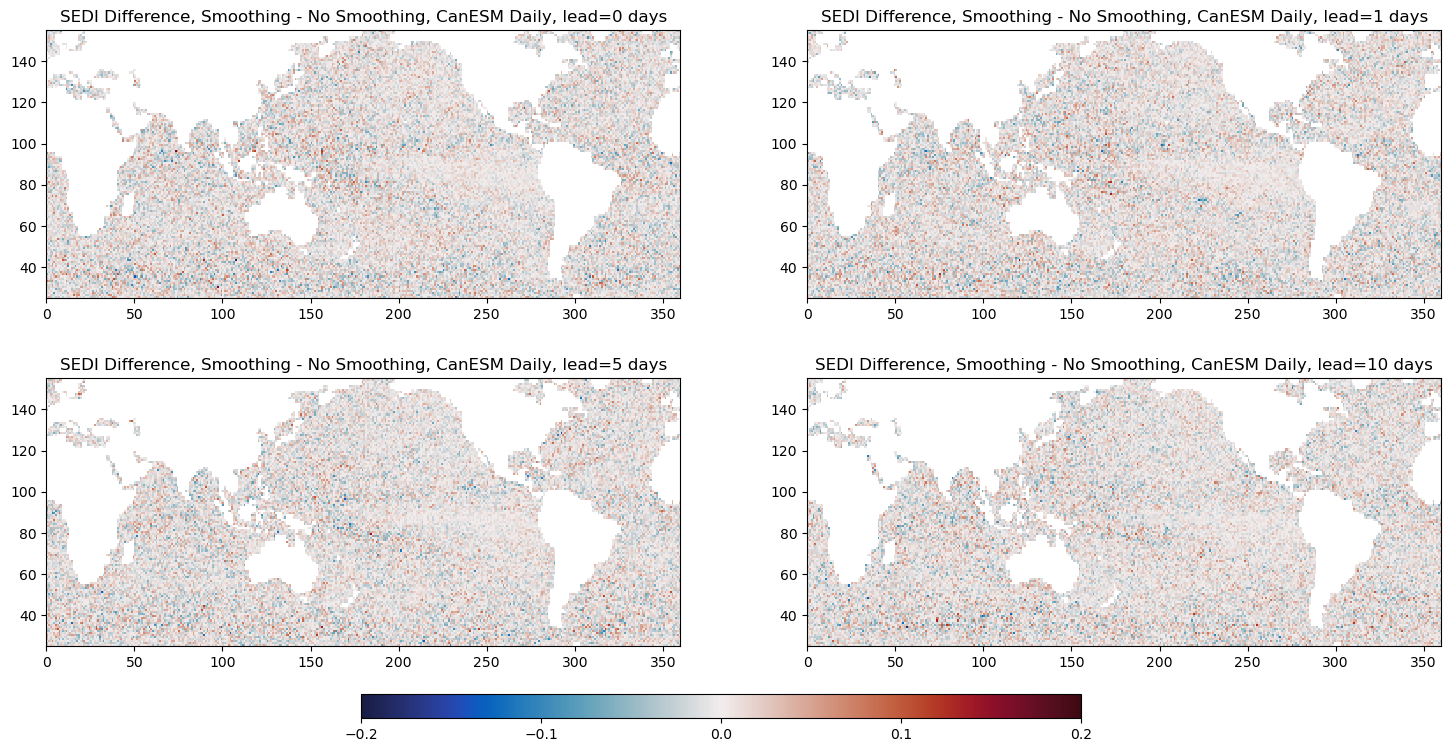

In [5]:
leadlist=[ 0, 1, 5, 10]
fSEDI_S={}
fSEDI_I={}
for ilead in leadlist:
    fSEDI_S[ilead]=xr.open_mfdataset([fnameSEDI_OISST_CanESM_daily(ilead,climyrs, smoothClim=True, meth=method, win=halfwin, 
                                                                   detr=detr, qt=qtile, delt=delt, qtvar=qtvar, jj=jj) \
                                    for jj in (0,60,120)],combine='nested')
    fSEDI_I[ilead]=xr.open_mfdataset([fnameSEDI_OISST_CanESM_daily(ilead,climyrs, smoothClim=False, meth=None, win=1, 
                                                                   detr=detr, qt=qtile, delt=delt, qtvar=qtvar, jj=jj) \
                                    for jj in (0,60,120)],combine='nested')
SEDICan=dict()
fig,axs=plt.subplots(2,2,figsize=(18,8),gridspec_kw={'hspace':.3})
ax=axs[0,0]; il=leadlist[0]
SEDI_S=fSEDI_S[il].SEDI
SEDI_I=fSEDI_I[il].SEDI
m1=ax.pcolormesh(SEDI_S-SEDI_I,vmin=-.2,vmax=.2,cmap=cm1)
ax.set_ylim(25,155)
ax.set_title(f'SEDI Difference, Smoothing - No Smoothing, CanESM Daily, lead={il} days')

ax=axs[0,1]; il=leadlist[1]
SEDI_S=fSEDI_S[il].SEDI
SEDI_I=fSEDI_I[il].SEDI
m1=ax.pcolormesh(SEDI_S-SEDI_I,vmin=-.2,vmax=.2,cmap=cm1)
ax.set_ylim(25,155)
ax.set_title(f'SEDI Difference, Smoothing - No Smoothing, CanESM Daily, lead={il} days')

ax=axs[1,0]; il=leadlist[2]
SEDI_S=fSEDI_S[il].SEDI
SEDI_I=fSEDI_I[il].SEDI
m1=ax.pcolormesh(SEDI_S-SEDI_I,vmin=-.2,vmax=.2,cmap=cm1)
ax.set_ylim(25,155)
ax.set_title(f'SEDI Difference, Smoothing - No Smoothing, CanESM Daily, lead={il} days')

ax=axs[1,1]; il=leadlist[3]
SEDI_S=fSEDI_S[il].SEDI
SEDI_I=fSEDI_I[il].SEDI
m1=ax.pcolormesh(SEDI_S-SEDI_I,vmin=-.2,vmax=.2,cmap=cm1)
ax.set_ylim(25,155)
ax.set_title(f'SEDI Difference, Smoothing - No Smoothing, CanESM Daily, lead={il} days')

ml=fig.add_axes([.3,.02,.4,.03])
fig.colorbar(m1,cax=ml,orientation='horizontal',ticks=[-.2,-.1,0,.1,.2])
for el in fSEDI_S.keys():
    fSEDI_S[el].close()
    fSEDI_I[el].close()